In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from collections import Counter
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

In [2]:
IMG_SIZE = 299
BATCH_SIZE = 32
EPOCHS = 15
LEARNING_RATE = 0.001

In [3]:
train_dir = r'C:\Users\srida\Downloads\Images_CNN\train'
test_dir = r'C:\Users\srida\Downloads\Images_CNN\test'

In [4]:
def get_class_counts(directory):
    """Counts the number of images in each class folder."""
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

In [5]:
class_counts = get_class_counts(train_dir)
sorted_classes = sorted(class_counts, key=class_counts.get, reverse=True)

In [6]:
top_100_classes = sorted_classes[:101]
next_25_classes = sorted_classes[101:]

In [7]:
split_1 = top_100_classes[:25]
split_2 = top_100_classes[25:50]
split_3 = top_100_classes[50:75]
split_4 = top_100_classes[75:100]
split_5 = next_25_classes

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
def create_generators(train_dir, test_dir, classes, batch_size=32, target_size=(299, 299)):
    """
    Creates train and test data generators for a specific set of classes.
    """
    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical'
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical'
    )
    return train_gen, test_gen

In [10]:
def create_inception_model(num_classes):
    """
    Creates an InceptionV3 model with the specified number of output classes.
    """
    base_model = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze Base Model Layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the Model
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [11]:
# Step 4: Training Function
def train_split_model(train_gen, test_gen, split_name):
    num_classes = train_gen.num_classes
    print(f"Training InceptionV3 for {split_name} with {num_classes} classes.")
    model = create_inception_model(num_classes)

    history = model.fit(
        train_gen,
        epochs=EPOCHS,
        validation_data=test_gen,
        steps_per_epoch=train_gen.samples // train_gen.batch_size,
        validation_steps=test_gen.samples // test_gen.batch_size)

    model.save(f'inceptionv3_model_{split_name}.h5')
    print(f"Model for {split_name} saved!\n")
    return history

In [12]:
# Step 5: Train Models for All Splits
train_gen_1, test_gen_1 = create_generators(train_dir, test_dir, split_1, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))
train_gen_2, test_gen_2 = create_generators(train_dir, test_dir, split_2, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))
train_gen_3, test_gen_3 = create_generators(train_dir, test_dir, split_3, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))
train_gen_4, test_gen_4 = create_generators(train_dir, test_dir, split_4, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))
train_gen_5, test_gen_5 = create_generators(train_dir, test_dir, split_5, BATCH_SIZE, (IMG_SIZE, IMG_SIZE))

Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.
Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.
Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.
Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.
Found 2478 images belonging to 37 classes.
Found 637 images belonging to 37 classes.


In [13]:
# Train and Save Models for Each Split
history_1 = train_split_model(train_gen_1, test_gen_1, 'split_1')

Training InceptionV3 for split_1 with 25 classes.
Epoch 1/15


C:\Users\srida\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - accuracy: 0.4679 - loss: 1.9078 - val_accuracy: 0.6528 - val_loss: 1.1738
Epoch 2/15


C:\Users\srida\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.5482
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 711s 1s/step - accuracy: 0.6346 - loss: 1.2052 - val_accuracy: 0.6709 - val_loss: 1.0903
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.3599
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 709s 1s/step - accuracy: 0.6598 - loss: 1.1177 - val_accuracy: 0.6701 - val_loss: 1.0879
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.1824
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 709s 1s/step - accuracy: 0.6835 - loss: 1.0387 - val_accuracy: 0.6855 - val_loss: 1.0353
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 1.5117
Epoch 9/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.6962 

Model for split_1 saved!



In [14]:
history_2 = train_split_model(train_gen_2, test_gen_2, 'split_2')

Training InceptionV3 for split_2 with 25 classes.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 912s 1s/step - accuracy: 0.5452 - loss: 1.5916 - val_accuracy: 0.7276 - val_loss: 0.9244
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.0777
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 716s 1s/step - accuracy: 0.6998 - loss: 0.9794 - val_accuracy: 0.7278 - val_loss: 0.9127
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 2.7449
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 714s 1s/step - accuracy: 0.7295 - loss: 0.8815 - val_accuracy: 0.7444 - val_loss: 0.8648
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4871
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 712s 1s/step - accuracy: 0.7492 - loss: 0.8191 - val_accuracy: 0.7666 - val_loss: 0.7939
Epoch 8/15
625/625 ━

Model for split_2 saved!



In [15]:
history_3 = train_split_model(train_gen_3, test_gen_3, 'split_3')

Training InceptionV3 for split_3 with 25 classes.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 910s 1s/step - accuracy: 0.5695 - loss: 1.5255 - val_accuracy: 0.7406 - val_loss: 0.8508
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.7359
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.7205 - loss: 0.9392 - val_accuracy: 0.7642 - val_loss: 0.7771
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1964
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 712s 1s/step - accuracy: 0.7506 - loss: 0.8239 - val_accuracy: 0.7756 - val_loss: 0.7643
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2319
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 721s 1s/step - accuracy: 0.7571 - loss: 0.8014 - val_accuracy: 0.7640 - val_loss: 0.7871
Epoch 8/15
625/625 ━

Model for split_3 saved!



In [16]:
history_4 = train_split_model(train_gen_4, test_gen_4, 'split_4')

Training InceptionV3 for split_4 with 25 classes.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 936s 1s/step - accuracy: 0.5040 - loss: 1.6838 - val_accuracy: 0.6863 - val_loss: 0.9771
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 1.1944
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 760s 1s/step - accuracy: 0.6605 - loss: 1.0972 - val_accuracy: 0.6933 - val_loss: 0.9499
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.7432
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 747s 1s/step - accuracy: 0.6949 - loss: 0.9823 - val_accuracy: 0.7027 - val_loss: 0.9356
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.7542
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 735s 1s/step - accuracy: 0.7101 - loss: 0.9186 - val_accuracy: 0.7143 - val_loss: 0.9014
Epoch 8/15
625/625 ━

Model for split_4 saved!



In [17]:
history_5 = train_split_model(train_gen_5, test_gen_5, 'split_5')

Training InceptionV3 for split_5 with 37 classes.
Epoch 1/15


C:\Users\srida\Anaconda\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


77/77 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.3789 - loss: 2.4522 - val_accuracy: 0.6957 - val_loss: 0.9427
Epoch 2/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5312 - loss: 1.3050 - val_accuracy: 0.6207 - val_loss: 1.0981
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7503 - loss: 0.7892 - val_accuracy: 0.7220 - val_loss: 0.8770
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7188 - loss: 0.9764 - val_accuracy: 0.8621 - val_loss: 0.4020
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8030 - loss: 0.5947 - val_accuracy: 0.7467 - val_loss: 0.7757
Epoch 6/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7500 - loss: 0.6130 - val_accuracy: 0.7586 - val_loss: 0.7290
Epoch 7/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8275 - loss: 0.5219 - val_accuracy: 0.7516 - val_loss: 0.7552
Epoch 8/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8750 - loss: 0.4151 - val_accuracy: 0.7241 - val_loss: 0.

Model for split_5 saved!



In [18]:
print("Class labels for Split 1:")
print(split_1)

print("\nClass labels for Split 2:")
print(split_2)

print("\nClass labels for Split 3:")
print(split_3)

print("\nClass labels for Split 4:")
print(split_4)

print("\nClass labels for Split 5:")
print(split_5)

Class labels for Split 1:
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder']

Class labels for Split 2:
['club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']

Class labels for Split 3:
['grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobs

In [19]:
def preprocess_image(image_path, target_size=(299, 299)):
    """
    Preprocess the image to feed into the InceptionV3 model.
    """
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)  # Normalize for InceptionV3
    return img_array

In [20]:
# Predict and Annotate Image
def annotate_image(model, image_path, class_names, output_path=None):
    """
    Predict the class of the input image, draw a green bounding box, and overlay the predicted class name.
    """
    # Preprocess the image
    img_array = preprocess_image(image_path)
    
    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Read the original image
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    
    # Draw a green bounding box (here, a box around the entire image)
    height, width, _ = original_img.shape
    cv2.rectangle(original_img, (10, 10), (width - 10, height - 10), color=(0, 255, 0), thickness=5)

    # Put the predicted class label on the image
    label = f"{predicted_class} ({confidence:.2f})"
    font_scale = 1.5
    thickness = 2
    cv2.putText(
        original_img,
        label,
        (20, 50),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=font_scale,
        color=(0, 255, 0),
        thickness=thickness,
    )

    # Display or Save the Annotated Image
    plt.figure(figsize=(8, 8))
    plt.imshow(original_img)
    plt.axis('off')
    plt.show()

    if output_path:
        cv2.imwrite(output_path, cv2.cvtColor(original_img, cv2.COLOR_RGB2BGR))
        print(f"Annotated image saved to {output_path}")

In [21]:
# Combined Model Prediction
def combined_model_prediction(image_path, models, splits, output_path=None):
    """
    Predict using multiple models and select the best prediction based on confidence.
    """
    img_array = preprocess_image(image_path)
    best_prediction = None
    best_confidence = -1
    best_class = None
    best_split = None

    for model, split in zip(models, splits):
        predictions = model.predict(img_array)
        confidence = np.max(predictions)
        if confidence > best_confidence:
            best_confidence = confidence
            best_class = split[np.argmax(predictions)]
            best_split = split

    # Annotate and display the image
    print(f"Best prediction: {best_class} (confidence: {best_confidence:.2f}) from {best_split}")
    annotate_image(models[splits.index(best_split)], image_path, best_split, output_path)

In [22]:
model_1 = load_model('inceptionv3_model_split_1.h5')
model_2 = load_model('inceptionv3_model_split_2.h5')
model_3 = load_model('inceptionv3_model_split_3.h5')
model_4 = load_model('inceptionv3_model_split_4.h5')
model_5 = load_model('inceptionv3_model_split_5.h5')

In [23]:
# Paths
image_path = r"C:\Users\srida\Downloads\Images_CNN\train\lobster_bisque\184830.jpg"
output_path = r'C:\path_to_save_annotated_image\annotated_image.jpg'

In [24]:
split_1 = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 
    'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 
    'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder']
split_2 = ['club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 
    'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 
    'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 
    'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 
    'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']
split_3=['grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 
         'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 
         'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 
         'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck']

Split_4=['pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 
         'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 
         'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 
         'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare']

split_5=['grapes', 'peas', 'pineapple', 'turnip', 'lettuce', 'soy beans', 'spinach', 'cucumber', 'onion', 
         'cabbage', 'garlic', 'tomato', 'bell pepper', 'sweetcorn', 'capsicum', 'pear', 'beetroot', 'jalepeno', 
         'kiwi', 'chilli pepper', 'corn', 'mango', 'eggplant', 'watermelon', 'paprika', 'carrot', 'lemon', 'raddish', 
         'cauliflower', 'pomegranate', 'potato', 'banana', 'orange', 'sweetpotato', 'apple', 'ginger', '.git']

Single Model Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


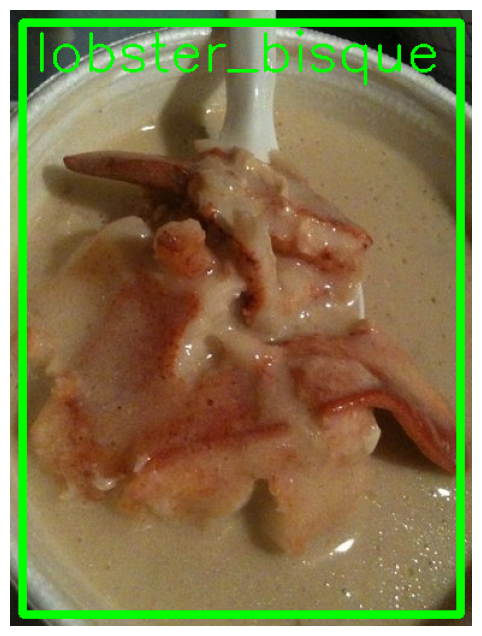

Annotated image saved to C:\path_to_save_annotated_image\annotated_image.jpg


In [25]:
print("Single Model Prediction:")
annotate_image(model_3, image_path, split_3, output_path)

Single Model Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


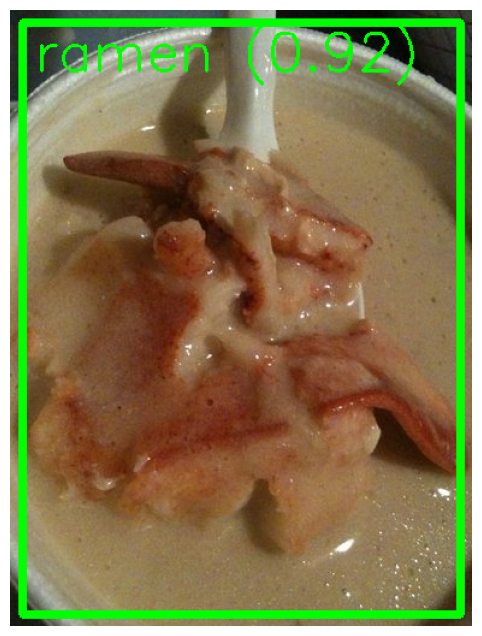

Annotated image saved to C:\path_to_save_annotated_image\annotated_image.jpg


In [26]:
print("Single Model Prediction:")
annotate_image(model_4, image_path, split_4, output_path)

Combined Model Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Best prediction: ramen (confidence: 0.92) from ['pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


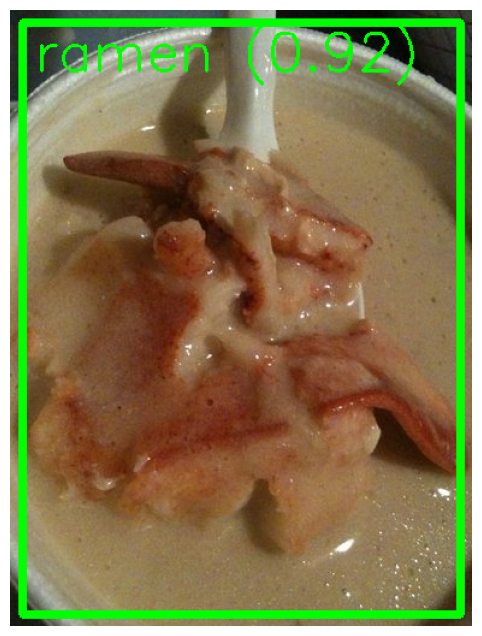

Annotated image saved to C:\path_to_save_annotated_image\annotated_image.jpg


In [27]:
# Combined Model Prediction
print("Combined Model Prediction:")
combined_model_prediction(image_path, [model_1, model_2,model_3, model_4,model_5], [split_1, split_2, split_3, split_4, split_5], output_path)

#### Model Evaluation

In [29]:
def evaluate_model(models, test_dataset, splits, calories_data):
    pred_labels = []
    true_labels = []

    # Iterate through the test dataset
    for images, labels in test_dataset:
        batch_size = images.shape[0]
        model_preds = []

        # Get predictions from each model
        for model, split in zip(models, splits):
            predictions = model.predict(images)
            # Get predicted classes (index of max probability)
            top_predictions = np.argmax(predictions, axis=1)

            # Convert the top predictions into the corresponding food item name
            pred_class = [split[pred] for pred in top_predictions]  # Map index to class label
            model_preds.append(pred_class)

        # For now, let's assume you're using the first model's predictions (or you could average them)
        pred_labels.extend(model_preds[0])  # Use first model's predictions for now
        true_labels.extend([split[label] for label in labels.numpy()])

    # Convert labels to lowercase as calories data is in lowercase
    pred_labels = [label.lower() for label in pred_labels]
    true_labels = [label.lower() for label in true_labels]

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

    # Calculate RMSE and MAE (if you have continuous calorie predictions)
    pred_calories = []
    for label in pred_labels:
        # Get the calories associated with each predicted item from the calories data
        calories_row = calories_data[calories_data['itemName'] == label]
        if not calories_row.empty:
            pred_calories.append(calories_row['calories'].values[0])
        else:
            pred_calories.append(0)  # Default to 0 if no match is found
    
    true_calories = []
    for label in true_labels:
        calories_row = calories_data[calories_data['itemName'] == label]
        if not calories_row.empty:
            true_calories.append(calories_row['calories'].values[0])
        else:
            true_calories.append(0)

    rmse = np.sqrt(mean_squared_error(true_calories, pred_calories))
    mae = np.mean(np.abs(np.array(true_calories) - np.array(pred_calories)))

    return accuracy, precision, recall, f1, rmse, mae

### Calorie Estimation

#### 1.Calories File Loading

In [32]:
calories_data = pd.read_csv("Calories_Dataset.csv")

print(calories_data.head())

    id  itemName weight  calories carbs protein   fat sodium cholesterol
0  252    banana   118g     105.0   27g    1.3g  0.4g  1.2mg         0mg
1  253     apple   182g      95.0   25g    0.5g  0.3g  1.8mg         0mg
2  254      kiwi    69g      42.0   10g    0.8g  0.4g  2.1mg         0mg
3  255     pizza   107g     285.0   36g     12g   10g  640mg        18mg
4  302  beetroot    50g      22.0    5g    0.8g  0.1g   39mg         0mg


In [33]:
# Preprocess Image
def preprocess_image(image_path, target_size=(299, 299)):
    """
    Preprocess the image to feed into the InceptionV3 model.
    """
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)  # Normalize for InceptionV3
    return img_array

In [34]:
# Function to predict calories based on the predicted item name
def estimate_calories(predicted_class, calories_data):
    """
    Given a predicted class name, estimate the calories by matching it with the dataset.
    Assumes item names in calories_data are in lowercase.
    """
    predicted_class_lower = predicted_class.lower()
    matched_item = calories_data[calories_data['itemName'] == predicted_class_lower]
    
    if not matched_item.empty:
        return matched_item['calories'].values[0]
    else:
        return None

In [35]:
# Function to annotate the image with predicted class and calories
def annotate_image(model, image_path, class_names, calories_data, output_path=None):
    """
    Predict the class of the input image, draw a bounding box, overlay the predicted class name and calories.
    """
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Estimate calories
    estimated_calories = estimate_calories(predicted_class, calories_data)
    
    # Read the original image
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    
    # Draw a green bounding box
    height, width, _ = original_img.shape
    cv2.rectangle(original_img, (10, 10), (width - 10, height - 10), color=(0, 255, 0), thickness=5)

    # Put the predicted class and calories label on the image
    label = f"{predicted_class} ({confidence:.2f}) - Calories: {estimated_calories}"
    font_scale = 1.5
    thickness = 2
    cv2.putText(
        original_img,
        label,
        (20, 50),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=font_scale,
        color=(0, 255, 0),
        thickness=thickness,
    )

    # Display or save the annotated image
    plt.figure(figsize=(8, 8))
    plt.imshow(original_img)
    plt.axis('off')
    plt.show()

    if output_path:
        cv2.imwrite(output_path, cv2.cvtColor(original_img, cv2.COLOR_RGB2BGR))
        print(f"Annotated image saved to {output_path}")

In [36]:
# Combined model prediction function
def combined_model_prediction(image_path, models, splits, calories_data, output_path=None):
    """
    Predict using multiple models and select the best prediction based on confidence.
    """
    img_array = preprocess_image(image_path)
    best_prediction = None
    best_confidence = -1
    best_class = None
    best_split = None

    for model, split in zip(models, splits):
        predictions = model.predict(img_array)
        confidence = np.max(predictions)
        if confidence > best_confidence:
            best_confidence = confidence
            best_class = split[np.argmax(predictions)]
            best_split = split

    # Estimate calories for the best prediction
    estimated_calories = estimate_calories(best_class, calories_data)
    
    # Annotate and display the image
    print(f"Best prediction: {best_class} (confidence: {best_confidence:.2f})")
    print(f"Estimated Calories: {estimated_calories}")
    annotate_image(models[splits.index(best_split)], image_path, best_split, calories_data, output_path)

In [37]:
image_path = r"C:\Users\srida\Downloads\Images_CNN\train\tomato\Image_67.jpg"
output_path = r'C:\path_to_save_annotated_image\annotated_image.jpg'

#### 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Best prediction: tomato (confidence: 0.95)
Estimated Calories: 22.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


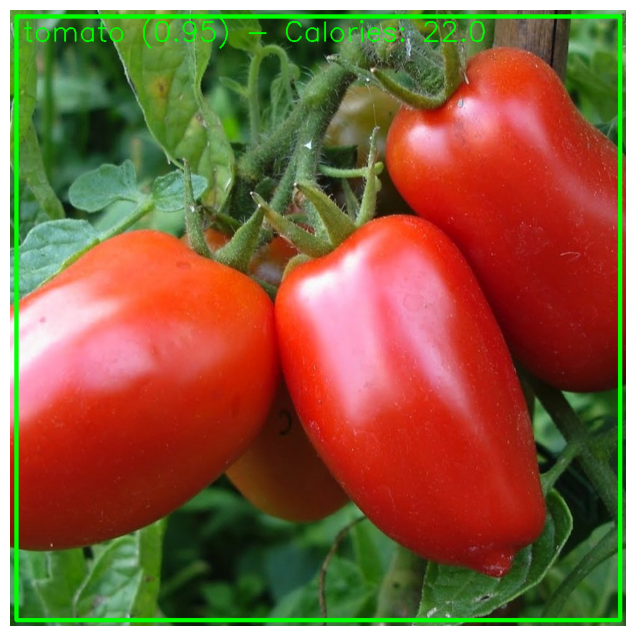

Annotated image saved to C:\path_to_save_annotated_image\annotated_image.jpg


In [39]:
# Combined Model Prediction and Calories Estimation
combined_model_prediction(image_path, [model_1,model_2,model_3,model_4,model_5], [split_1, split_2,split_3,split_4,split_5], calories_data, output_path)

In [40]:
import pickle

# Assuming combined_model is your final combined model
combined_model = [model_1, model_2, model_3, model_4, model_5]  # Adjust as per your final model

# Save the combined model
with open('final_combined_model.pkl', 'wb') as file:
    pickle.dump(combined_model, file)

print("Final combined model saved as 'final_combined_model.pkl'")

Final combined model saved as 'final_combined_model.pkl'


In [41]:
from tensorflow.keras.models import save_model

# Assuming model_1, model_2, ..., model_5 are your individual models
models = [model_1, model_2, model_3, model_4, model_5]

for i, model in enumerate(models, start=1):
    save_model(model, f'model_{i}.h5')
    print(f"Model {i} saved as 'model_{i}.h5'")

Model 1 saved as 'model_1.h5'


Model 2 saved as 'model_2.h5'


Model 3 saved as 'model_3.h5'


Model 4 saved as 'model_4.h5'
Model 5 saved as 'model_5.h5'


In [42]:
import pickle

# Save the list of models as a pickle file
with open('final_combined_model.pkl', 'wb') as file:
    pickle.dump([model_1, model_2, model_3, model_4, model_5], file)

print("All models saved in 'final_combined_model.pkl'")

All models saved in 'final_combined_model.pkl'


In [43]:
for i, model in enumerate(models, start=1):
    model.save(f'model_{i}.keras')
    print(f"Model {i} saved as 'model_{i}.keras'")

Model 1 saved as 'model_1.keras'
Model 2 saved as 'model_2.keras'
Model 3 saved as 'model_3.keras'
Model 4 saved as 'model_4.keras'
Model 5 saved as 'model_5.keras'


In [44]:
from tensorflow.keras.models import load_model

# Load a specific model
model_1 = load_model('model_1.h5')

In [45]:
# Load all models from a pickle file
with open('final_combined_model.pkl', 'rb') as file:
    models = pickle.load(file)

# Access individual models
model_1 = models[0]

C:\Users\srida\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [46]:
from tensorflow.keras.models import load_model

# Load each saved model
model_1 = load_model('model_1.h5')
model_2 = load_model('model_2.h5')
model_3 = load_model('model_3.h5')
model_4 = load_model('model_4.h5')
model_5 = load_model('model_5.h5')

# Combine into a list or any structure you prefer
final_model = [model_1, model_2, model_3, model_4, model_5]

print("All models loaded successfully!")

All models loaded successfully!


In [47]:
import pickle

# Save the list of models as a pickle file
with open('final_combined_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Final combined model saved as 'final_combined_model.pkl'")

Final combined model saved as 'final_combined_model.pkl'


In [48]:
import pickle

# Load all models from the pickle file
with open('final_combined_model.pkl', 'rb') as file:
    final_model = pickle.load(file)

# Access individual models from the list
model_1 = final_model[0]
model_2 = final_model[1]
model_3 = final_model[2]
model_4 = final_model[3]
model_5 = final_model[4]

print("Combined model loaded successfully!")

C:\Users\srida\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Combined model loaded successfully!


In [49]:
image_path = r"C:\Users\srida\Downloads\Images_CNN\train\tomato\Image_67.jpg" 

In [145]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_combined_model(test_data, test_labels, models, class_mappings):
    y_true = []
    y_pred = []

    for i in range(len(test_data)):
        image = test_data[i]
        true_label = test_labels[i]

        # Store model predictions and their confidence scores
        predictions = []

        for model, mapping in zip(models, class_mappings):
            pred = model.predict(np.expand_dims(image, axis=0))
            predicted_class_idx = np.argmax(pred)
            confidence = np.max(pred)
            predicted_class_name = mapping[predicted_class_idx]
            predictions.append((predicted_class_name, confidence))

        # Select the prediction with the highest confidence
        best_prediction = max(predictions, key=lambda x: x[1])
        predicted_class = best_prediction[0]

        # Append to results
        y_true.append(true_label)
        y_pred.append(predicted_class)

    # Evaluate performance
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred, labels=list(class_mappings[0].values())))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=list(class_mappings[0].values())))
    print("\nAccuracy:", accuracy_score(y_true, y_pred))

In [160]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model_performance(model, test_gen, class_names):
    test_labels = test_gen.classes
    predictions = model.predict(test_gen, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(test_labels, predicted_classes)
    print("Confusion Matrix:\n", cm)

    # Classification Report
    cr = classification_report(test_labels, predicted_classes, target_names=class_names)
    print("Classification Report:\n", cr)

    return cm, cr

# Evaluate models on their respective test data
cm_1, cr_1 = evaluate_model_performance(model_1, test_gen_1, split_1)
cm_2, cr_2 = evaluate_model_performance(model_2, test_gen_2, split_2)
cm_3, cr_3 = evaluate_model_performance(model_3, test_gen_3, split_3)
cm_4, cr_4 = evaluate_model_performance(model_4, test_gen_4, split_4)

157/157 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step
Confusion Matrix:
 [[ 4  8 10 12  4  8  6  9  9  7  5  5 14  2 10  7  8  8 10 10  5 16  7  6
  10]
 [ 3 12 11 12  1  5 11 10  8  9  6  6  8 10  4  5 13  5  4  2 10 10  4 18
  13]
 [ 6  5  7  9  4 11  8  6  6 10  2  8 14  5  2 11  9 11  4 13  6 11 14 12
   6]
 [ 5 13 11  6  4 10  9 16  8  7  5  7 14  6  4  9  5  4  9  6  5  7 10 10
  10]
 [ 6  9 12 11  4  7  6  8  9  6  7  5 11  5  7 12 14  4  6  9  8  8 12  6
   8]
 [ 3  9 11 11  6  9  5 11  7  7  5  6  6  9 12  7  9  5  9  9 13  7  8  9
   7]
 [ 4  8 12  5  6 11  3 12  9  9  9  2 13 11  4  6  7  6 11 11  6  8  9 10
   8]
 [ 4 13 11 12  7  7  7  9  6  6  4  9 10  4  6  9  6  9  8  4 15  8 10  6
  10]
 [ 5 11 13  9  8  8  5  9  7  7  3  7 12 10  6  9 10 14  6  6  9  4  5  7
  10]
 [ 5  6  8  6  5 11  8  7 10  5  2  7 15 11 12  8 18  5  9  9  7 13  5  4
   4]
 [ 7 11  8  5 13 10  5 11  7 10  1  3  8  4 15  8  9 11  7  5  7 14  7  5
   9]
 [ 3 15  4  8  6 11  5 14  7  6  6  6 11  8 12  9  6  8 10 

In [161]:
# Plotting Training and Validation Loss & Accuracy
def plot_history(history, split_name):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{split_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{split_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

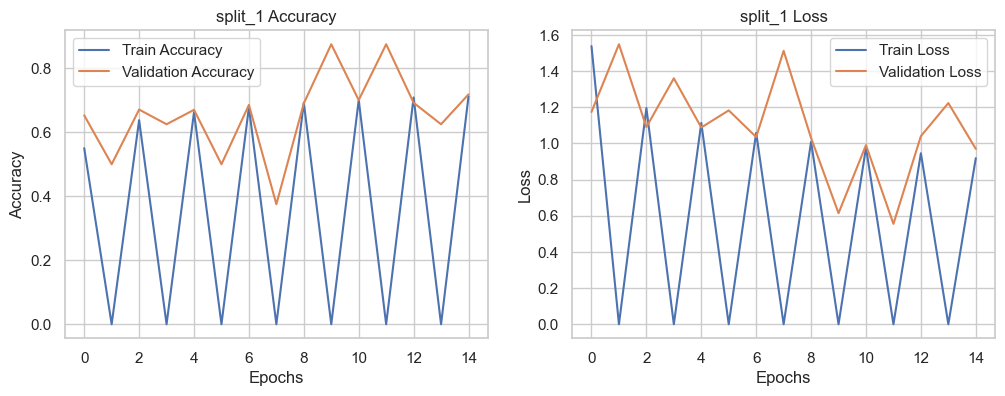

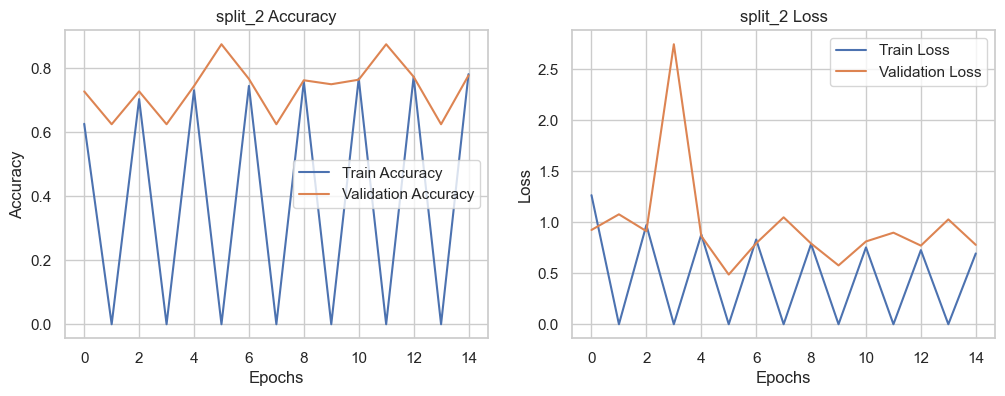

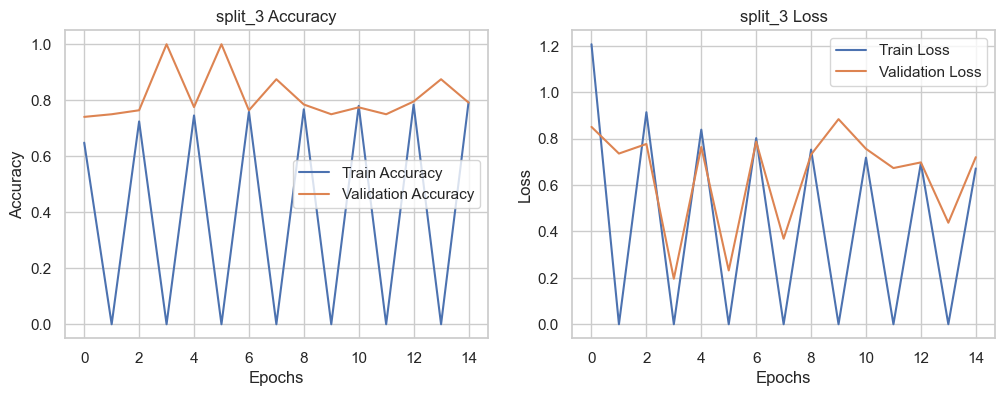

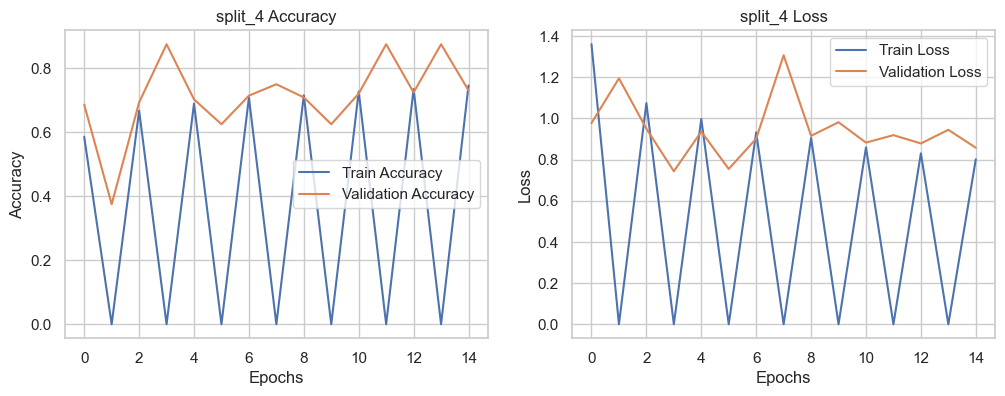

In [162]:
# Plot performance graphs for each split
plot_history(history_1, 'split_1')
plot_history(history_2, 'split_2')
plot_history(history_3, 'split_3')
plot_history(history_4, 'split_4')

In [168]:
def load_models():
    model_1 = tf.keras.models.load_model('inceptionv3_model_split_1.h5')
    model_2 = tf.keras.models.load_model('inceptionv3_model_split_2.h5')
    model_3 = tf.keras.models.load_model('inceptionv3_model_split_3.h5')
    model_4 = tf.keras.models.load_model('inceptionv3_model_split_4.h5')
    model_5 = tf.keras.models.load_model('inceptionv3_model_split_5.h5')
    return [model_1, model_2, model_3, model_4, model_5]

In [170]:
# Function to combine predictions from all models using majority voting
def combine_predictions(models, test_gen):
    predictions = []
    true_labels = test_gen.classes
    
    for model in models:
        # Predict using the model
        pred = model.predict(test_gen, verbose=1)
        pred_classes = np.argmax(pred, axis=1)  # Get predicted class indices
        predictions.append(pred_classes)
    
    # Convert predictions to an array for majority voting
    predictions = np.array(predictions)
    combined_predictions = []
    
    for i in range(predictions.shape[1]):  # Loop through each image
        # Get the predicted class with the majority vote
        votes = predictions[:, i]
        combined_class = np.bincount(votes).argmax()  # Majority voting
        combined_predictions.append(combined_class)
    
    return np.array(combined_predictions), true_labels

In [172]:
# Function to evaluate the combined model
def evaluate_combined_model(models, test_gen):
    combined_predictions, true_labels = combine_predictions(models, test_gen)
    
    # Accuracy
    accuracy = accuracy_score(true_labels, combined_predictions)
    print(f"Combined Model Accuracy: {accuracy}")
    
    # Classification Report
    cr = classification_report(true_labels, combined_predictions, target_names=test_gen.classes)
    print("Classification Report:\n", cr)
    
    # Confusion Matrix
    cm = confusion_matrix(true_labels, combined_predictions)
    print("Confusion Matrix:\n", cm)

    return accuracy, cr, cm

In [174]:
models = load_models()

In [218]:
def get_validation_metrics(histories, model_names):
    results = []
    for history, name in zip(histories, model_names):
        val_acc = history.history['val_accuracy'][-1]
        val_loss = history.history['val_loss'][-1]
        results.append({'Model': name, 'Validation Accuracy': val_acc, 'Validation Loss': val_loss})
    return results

In [220]:
histories = [history_1, history_2, history_3, history_4, history_5]  # Replace with your actual histories
model_names = ['Model 1 - Split 1', 'Model 2 - Split 2', 'Model 3 - Split 3', 'Model 4 - Split 4', 'Model 5 - Split 5']

In [222]:
validation_results = get_validation_metrics(histories, model_names)

In [224]:
for result in validation_results:
    print(f"{result['Model']}:")
    print(f"  Validation Accuracy: {result['Validation Accuracy']:.4f}")
    print(f"  Validation Loss: {result['Validation Loss']:.4f}")
    print()

Model 1 - Split 1:
  Validation Accuracy: 0.7183
  Validation Loss: 0.9698

Model 2 - Split 2:
  Validation Accuracy: 0.7776
  Validation Loss: 0.7782

Model 3 - Split 3:
  Validation Accuracy: 0.7919
  Validation Loss: 0.7202

Model 4 - Split 4:
  Validation Accuracy: 0.7310
  Validation Loss: 0.8574

Model 5 - Split 5:
  Validation Accuracy: 0.7599
  Validation Loss: 0.7316



# Load Testing

In [123]:
import time
import psutil
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import cv2
import pandas as pd

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = cv2.resize(image, (299, 299))  
    image = np.expand_dims(image, axis=0) 
    image = image / 255.0  
    return image

def get_model_prediction(model, image):
    prediction = model.predict(image)
    if isinstance(prediction, np.ndarray):
        if prediction.ndim == 1:  
            return np.zeros_like(prediction)
        elif prediction.ndim == 2:  
            return prediction
    return np.array([prediction])  

def ensemble_prediction(image_path, models):
    image = preprocess_image(image_path)
    
    predictions = []
    for model in models:
        prediction = get_model_prediction(model, image)
        predictions.append(prediction.flatten())  
    
    avg_prediction = np.mean(predictions, axis=0)
    return np.argmax(avg_prediction) 

def monitor_resources():
    memory_info = psutil.virtual_memory()
    cpu_usage = psutil.cpu_percent(interval=1)
    return cpu_usage, memory_info.percent

def load_test(image_paths, models, num_threads=100, test_duration=60):
    try:
        test_results = []
        
        start_time = time.time()
        end_time = start_time + test_duration
        total_requests = 0
        successful_requests = 0
        latencies = []

        while time.time() < end_time:
            with ThreadPoolExecutor(max_workers=num_threads) as executor:
                futures = [executor.submit(ensemble_prediction, image_path, models) for image_path in image_paths]
                
                for future in futures:
                    start_request_time = time.time()
                    try:
                        future.result()  
                        successful_requests += 1
                    except Exception as e:
                        print(f"Error processing image: {e}")
                    
                    latency = time.time() - start_request_time
                    latencies.append(latency)
                    total_requests += 1

            cpu_usage, memory_usage = monitor_resources()

            throughput = total_requests / (time.time() - start_time)

            test_results.append({
                'Time Elapsed (s)': time.time() - start_time,
                'Requests Handled': total_requests,
                'Successful Requests': successful_requests,
                'Throughput (RPS)': throughput,
                'CPU Usage (%)': cpu_usage,
                'Memory Usage (%)': memory_usage,
                'Average Latency (s)': np.mean(latencies) if latencies else 0
            })
        
        df = pd.DataFrame(test_results)
        print(df)

    except Exception as e:
        print(f"Error during load test: {e}")

image_paths = ["C:/Users/indra/Downloads/Images_CNN/test/apple/Image_9.jpg", 
               "C:/Users/indra/Downloads/Images_CNN/test/chocolate_cake/915139.jpg",
               "C:/Users/indra/Downloads/Images_CNN/test/sushi/964994.jpg",
               "C:/Users/indra/Downloads/Images_CNN/test/tuna_tartare/92525.jpg",
              "C:/Users/indra/Downloads/Images_CNN/test/apple/Image_9.jpg", 
    "C:/Users/indra/Downloads/Images_CNN/test/chocolate_cake/915139.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/964994.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/tuna_tartare/92525.jpg",
     "C:/Users/indra/Downloads/Images_CNN/test/sushi/2238477.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120484.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120573.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2120972.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2143954.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/sushi/2214270.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/919902.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/868613.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/875796.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/takoyaki/902263.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/719300.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/989842.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/82163.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/777839.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/800516.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/812692.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/822028.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/825496.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/890213.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/917040.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/920230.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/924198.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/651345.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/652074.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/657705.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/663294.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/samosa/693978.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/381371.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/923683.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/953859.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/79767.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/677373.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/794603.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/823932.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/60317.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/563481.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/569858.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/575335.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/582439.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/601189.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/647372.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/654308.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/659943.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/664146.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/452303.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/469726.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/474187.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/486418.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/491739.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/504864.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/545679.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/550824.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/550829.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/551141.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/omelette/38978.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/543282.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/99832.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/954057.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/967199.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/969929.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/990299.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/83207.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/790194.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/800060.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/816424.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/841535.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/926262.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/929887.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/943591.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/6457.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/6458.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/608822.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/647314.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/688801.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/689806.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/698454.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/766255.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/767674.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/775294.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/49554.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/54856.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/468124.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/486053.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/527339.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/oysters/535405.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/63878.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/90167.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/97166.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/833264.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/873308.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/873378.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/888114.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/901660.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/942002.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/945740.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/995526.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/71511.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/709713.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/748440.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/750855.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/751188.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/783226.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/ice_cream/786773.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/616105.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/969752.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/803941.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/842817.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/860920.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/871818.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/905087.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/914982.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/921971.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/70218.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/76021.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/79489.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/669805.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/695673.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/711581.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/719240.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/735848.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/737408.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/765812.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/773029.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/788556.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/791155.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/792293.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/521073.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/540097.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/544446.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/549487.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/549932.jpg",
    "C:/Users/indra/Downloads/Images_CNN/test/guacamole/600421.jpg" ]

models = [model_1]  

Result = pd.DataFrame(load_test(image_paths, models, num_threads=100, test_duration=60))  
Result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

""


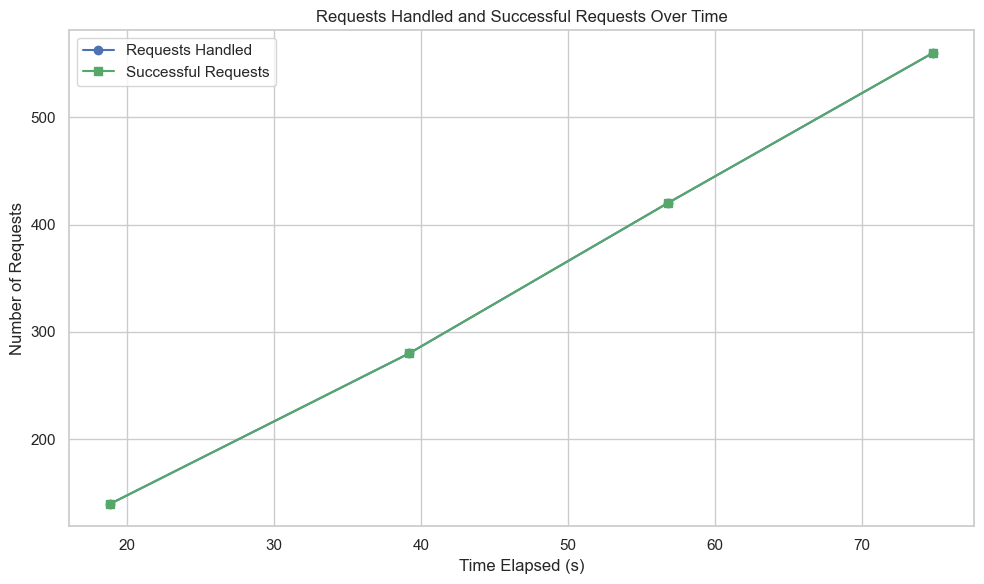

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Load test results as a DataFrame
data = {
    'Time Elapsed (s)': [18.889858, 39.198659, 56.787906, 74.832960],
    'Requests Handled': [140, 280, 420, 560],
    'Successful Requests': [140, 280, 420, 560],
}

df = pd.DataFrame(data)

# Create a figure for the plots
plt.figure(figsize=(10, 6))

# Plot Requests Handled over Time Elapsed
plt.plot(df['Time Elapsed (s)'], df['Requests Handled'], label='Requests Handled', color='b', marker='o')

# Plot Successful Requests over Time Elapsed
plt.plot(df['Time Elapsed (s)'], df['Successful Requests'], label='Successful Requests', color='g', marker='s')

# Title and labels
plt.title('Requests Handled and Successful Requests Over Time')
plt.xlabel('Time Elapsed (s)')
plt.ylabel('Number of Requests')
plt.legend(loc='upper left')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [1]:
pip install nbmerge

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6428 sha256=c0d3fb6a4451f914ea10c1964c2d00f80c6a39475d741d3f24993468128df849
  Stored in directory: c:\users\indra\appdata\local\pip\cache\wheels\05\7d\2c\44d9b357515a0b4f972f5438115face603f69e8c70233ddc1a
Successfully built nbmerge
Note: you may need to restart the kernel to use updated packages.


In [4]:
import nbformat

# Function to merge notebooks
def merge_notebooks(notebook1_path, notebook2_path, output_path):
    # Load the first notebook
    with open(notebook1_path, 'r', encoding='utf-8') as f:
        notebook1 = nbformat.read(f, as_version=4)
    
    # Load the second notebook
    with open(notebook2_path, 'r', encoding='utf-8') as f:
        notebook2 = nbformat.read(f, as_version=4)
    
    # Create a new notebook by combining the cells
    merged_notebook = nbformat.v4.new_notebook()
    merged_notebook.cells = notebook1.cells + notebook2.cells
    
    # Save the merged notebook
    with open(output_path, 'w', encoding='utf-8') as f:
        nbformat.write(merged_notebook, f)

# Specify the input and output file paths
notebook1 = "main_code.ipynb"
notebook2 = "Testing.ipynb"
output_notebook = "main_code_1.ipynb"

# Merge the notebooks
merge_notebooks(notebook1, notebook2, output_notebook)

print(f"Merged notebook saved to {output_notebook}")


Merged notebook saved to main_code_1.ipynb
